# Data Wrangling
## Foundations of Machine Learning
### `! git clone https://www.github.com/DS3001/wrangling`

## Data Wrangling
- First: Data are plural, and the singular is datum. Second: If you can't love data at their worst, you don't deserve them at their best.
- The data must be **wrangled** or **cleaned** into some form that is amenable to analysis
- This can be an exhausting process, and there is no uniquely correct way to do it: choices have consequences
- Common problem: Don't confuse a string that corresponds to a variable's name (e.g. `'Age'`), and a variable holding the string that corresponds to a variable's name (e.g. `var='Age'`)

## Replication and Open Science
- Before we go on: Never, ever edit the original data *file(s)*. Do not edit and overwrite the file. Never, ever do this.
- You never know what will matter later, so always keep the original data files in a safe place.
- Document everything you do in a commented script or markdown file so that in the future, you or someone else can **reproduce** the steps you took to clean the data.
- **Reproducibility** means that people can take your data and recreate your results on their own. **Replicability** means that people can do your entire project from scratch (experiment, data, analysis) and get similar results.
- The biggest threat to science is the inability to reproduce/replicate results, and a lack of transparency in how results were created: It destroys confidence in the entire enterprise, and makes it impossible for us to make progress.

## Files Containing Data
- These are the most common file formats I am aware of, and what programs or languages created them:

| File Format Extension | Likely Source |
| :---: | :---:|
|.csv | Any |
|.Rda, .Rdata | R |
|.dat | SAS |
|.sav | SPSS |
|.dta | Stata |
|.mat | MATLAB |
|.xls, .xlsx | Excel |
|.json | JavaScript Object Notation|

- Like most people, I prefer all of my data to be in *comma separated value* or .csv format: The first thing I do with new data is switch them into .csv to ensure that anyone I'm working with can access them
- Some file formats are roughly spreadsheets, like .csv or .xls, but a .json or .db file contains database entries that must be parsed
- To analyze data, we typically want them in a particular form: A rectangular matrix

## Codebooks
- Data come with documentation, which I am going to generically call a *codebook* or a *data dictionary*
- The documentation is usually not very good!
- It might be a formal codebook, or it might just be the survey itself that respondents filled out, or it might just be the html/javascript code that created the web page that captured the responses
- If you don't have a codebook you shouldn't be analyzing the data: You have no clue what it is
    - `Employees` might be a `True/False` about whether the firm has any employees at all, or it might be the number of employees it employs, and so on

## Data
- We are typically interested in modelling some kind of phenomenon: defendants, atoms, stock prices, shark attacks, earthquakes, students, cancer, countries, ...
- A specific case or instance of the phenomenon is called an **observation**
- The observed attributes of a case are called **variables**
- The recorded value of a particular attribute for a particular observation is called a **value**
- For example, "What was the bond amount for defendant 1112?" "$550"
    - The variable is the bond amount
    - The observation is defendant 1112
    - The value of the bond for defendant 1112 is 550 dollars
    - The data consist of observations of attributes of different defendants in a legal system

## Matrices and Data Frames
- I am going to call an ordered collection with $N$ elements a "tuple of length $N$"; it could be a base Python tuple or a NumPy list, etc.
- When we stack $K$ tuples $(x_1, x_2, ..., x_K)$ of length $N$ side by side, we get an $N \times K$ object called a *matrix*:
$$
X = \left[ x_1, x_2, ..., x_K \right] = \left[ \begin{array}{cccc}
x_{11} & x_{12} & \dots  & x_{1K} \\
x_{21} & x_{22} & \dots  & x_{2K} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{NK} \\
\end{array}\right]
$$
- The indices for $x_{ik}$ are $ik=(\text{row},\text{column})$, so the tuple $(x_{i1},...,x_{iK})$ is row $i$ and the tuple $(x_{1k}, x_{2k},...,x_{Nk})$ is column $k$
- Matrices have many applications throughout mathematics, statistics, and data science, but are the basic model of data
- When each row represents an *observation* and each column represents a *variable*, we call the matrix $X$ a *dataframe*
- Advanced machine learning makes calculations directly on the dataframe $X$ as a matrix using linear algebra and vector calculus (e.g., $ \hat{\beta} = (X'X)^{-1} X'y$)

## Pandas
- Since Python is a general purpose computing language, it does not automatically have built-in functionality to effectively load, clean, and manipulate data
- **Pandas** is currently the most popular data-cleaning package for Python: A set of new functions and object classes that expand the base functionality of Python
- You load Pandas into your environment using `import pandas as pd`
- The `import` keyword tells Python to look for a package named `pandas`, and the `as` keyword says we'd like to use the letters `pd` to refer to the pandas module
- The fundamental class object of the Pandas package is the **dataframe**
- There's already a package I like better called Polars

In [2]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace

##You can use markdown and html to format

## Loading Data
- The publicly available data that happen to be on my desk right now concern pretrial detention of all defendants in Virginia in 2017; the data file and codebook are available in the folder for today's class
- To load .csv data, you'll typically use the `.read_csv(filename)` class method:
```python
df = pd.read_csv('./data/VirginiaPretrialData2017.csv',low_memory=False)
```
- .csv files load easily on any computer for any language, which is why we generally prefer them. If you have an Excel or Stata or SAS file, it can require some time/effort to get it loaded.

## Getting the Justice Data
- This is a fairly large dataset: 53MB
- GitHub does not want to host files that large for us
- We're going to have to get it straight from the source: The Virginia Sentencing Commission
- The website where it lives is: http://www.vcsc.virginia.gov/pretrialdataproject2017.html
- To bring it into our workspace, we'll just use Pandas to go get it

In [5]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

## Getting Started With Data
- The most basic questions are, How many observations? How many variables, and what are they named?
- Every Pandas dataframe has a set of class attributes that are useful for looking at:
    - `.shape`: The number of rows and columns
    - `.columns`: The names of the columns (`print(df.columns.tolist())` will print all of them)
    - `.dtypes`: The types of the variables
- To get into the data, you have to look at the *codebook* and read both the definitions of the variables and what kinds of values they can take

In [ ]:
#df = pd.read_csv('./data/VirginiaPretrialData2017.csv',low_memory=False) # Load the data
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns[1:5], '\n') # First five column names

(22986, 709) 

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

Index(['REQ_REC#', 'Defendant_Sex', 'Defendant_Race', 'Defendant_BirthYear'], dtype='object') 



## Visually Inspecting the Dataframe (`.head()`, `.iloc[]`, `.loc[]`)
- Whenever you load a data set, you should take a look at its actual values; click on the .csv file in the file explorer panel
- A nice way to do this is use the Pandas dataframe method, `df.head()`, but if you have a lot of variables, it can be a bit unwieldy
- Jupyter has a data file viewer that represents it as a spreadsheet that can be helpful
- If you want to pull particular rows or columns, or otherwise slice the dataframe, you can use the **integer locator class method** `df.iloc[x:y,a:b]` for numeric address and **locator class** `df.loc[row_labels, col_labels]` if you know the names of variables and rows that you want

In [ ]:
#df.head()
print(df.iloc[1:5,1:5],'\n') # Show the zero-th to fourth rows/zero-th to seventh columns
print(df.loc[1:5,('Defendant_Sex','Defendant_Race')],'\n') # Show rows 1:5 of Sex and Race

  REQ_REC# Defendant_Sex Defendant_Race Defendant_BirthYear
1        3             M              B                1956
2        4             M              W                1990
3        6             M              B                1989
4        7             F              W                1988 

  Defendant_Sex Defendant_Race
1             M              B
2             M              W
3             M              B
4             F              W
5             M              B 



## Renaming and Creating Variables
- Variable names are often too verbose: `BondAmountAtInitialContact`, `Defendant_IndigencyStatus`, and `CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp` -- you're going to have to type these things dozens or hundreds of times
- To rename a variable, you can use `df = df.rename(columns = {oldName:newName})` (be careful to pass strings)
- To create a variable, you supply the new name as a string, as if you are indexing, `df[varName]=expression`

In [ ]:
df = df.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'}) # Rename variables
df['age'] = df['Defendant_Age'] # Creating a new variable called age without replacing Defendant_Age

## Exercise (Loading and Renaming)
- Load the shark data, `sharks.csv`
- What are the dimensions of the data? What are the types of the variables? What variables look interesting?
- Use `.head()`, `.iloc[]` and `.loc[]` to take a look at some variables or rows
- Rename the `Fatal (Y/N)` to `fatal`
- The shark data look bad, but almost *all* real data that haven't already been cleaned look this bad

In [3]:
! git clone https://www.github.com/DS3001/wrangling
sdf = pd.read_csv('./wrangling/data/sharks.csv', low_memory=False)
sdf.head()


fatal: destination path 'wrangling' already exists and is not an empty directory.


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Taxomony of Variables
- A **numeric variable** takes real number values like -1 or 5.125 and has units, so magnitudes can at least be compared (e.g. Temperature (in Fahrenheit), Salary (in dollars), Weight (thousands of pounds), Counts (numbers of students))
- With a **categorical variable**, there are a finite number of distinct categories the variable might take (e.g. Enrolled in College/University or Not, Alive/Dead, Animal Species, Make of a Car)
    - There are categorical *variables* that take numeric *values*, but their units are meaningless (e.g. Zip Code, Area Code, NAICS)
- There are times where the appropriate thing to do is model a numeric as a categorical (e.g. grade levels in school are ordered...?)
- When a categorical variable takes binary values (e.g. alive/dead), we typically represent it with a **dummy variable** which takes the numeric value 0 or 1 (e.g. `alive == 1`, `dead == 0`)

## Unique Values, Frequency Tables, Histograms
- Looking at a column of numbers can often be unproductive, especially if there are many observations
- The best tools to automate your understanding of a variable are:
    - `df[var].unique()`: Provides a list of the unique values occuring for that variable
    - `df[var].value_counts()`: Tabulates the number of times each unique value occurs
    - `df[var].hist()`: Plots the value counts as a bar graph
- `.unique()` is, in particular, extremely useful for learning how dirty the data is

['M' 'F' 'n' ' '] 

sex
M    16587
F     6396
n        2
         1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



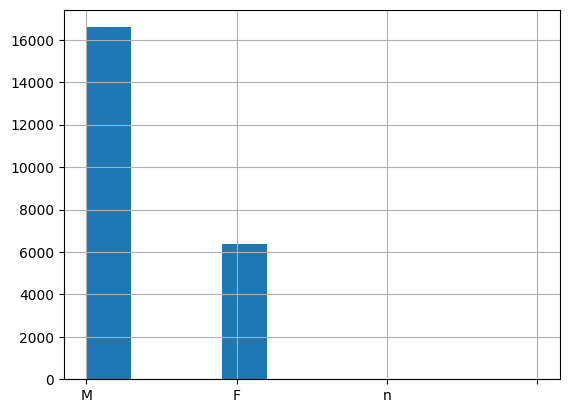

In [ ]:
df['sex'] = df['Defendant_Sex'] # Categorical variable example
var = 'sex'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[99  9  0  1] 

is_poor
0     11500
1     10465
9       747
99      274
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



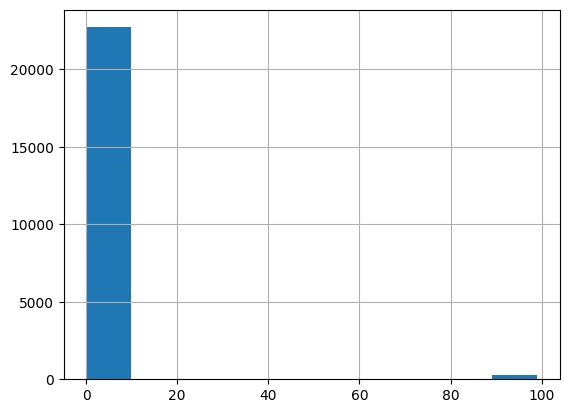

In [ ]:
var = 'is_poor' # A dummy variable
print(df[var].unique(),'\n') # Notice these gooses have already messed up their coding
print(df[var].value_counts(), '\n') # Look at the 9 and 99: That is awful
print(df[var].hist(), '\n') # What is "bad" about this plot?

['31' '60' '27' '28' '39' '35' '18' '21' '66' '25' '38' '22' '40' '48'
 '34' '37' '20' '54' '46' '58' '55' '51' '24' '32' '30' '36' '26' '43'
 '56' '49' '19' '50' '52' '41' '29' '33' '42' '53' '44' '59' '45' '23'
 '63' '57' '47' '61' '78' '65' '67' '64' '62' '74' '68' '70' '69' '80'
 '75' '77' '73' '71' '72' ' ' '79' '81' '85' '100' '82' '76' '83' '93' '0'
 '99' '84' '87' '86' '92' '88'] 

age
27    939
26    922
25    909
24    877
22    874
     ... 
0       1
84      1
87      1
86      1
88      1
Name: count, Length: 77, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



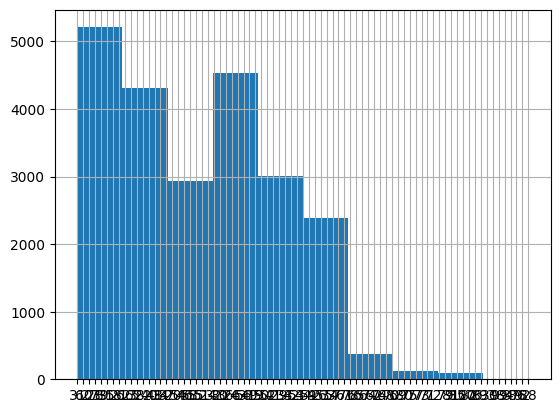

In [ ]:
var = 'age' # A numeric variable
print(df[var].unique(),'\n') # Do you see some problem values?
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n') # This does not look very good.

## Exercise (Examining the Data)
- What type (numeric, categorical, dummy) are each of the variables in the shark data?
- Use `.unique()`, `.value_counts()` and `.hist()` to take a look at variables that interest you in the shark data (Type, Activity, Year, Fatal, Age, Country are a good start)
- What patterns or features of the data jump out at you?
- Which variables are relatively clean? Which are relatively dirty? Which do you think could be salvaged for interesting analysis?

N          4439
Y          1400
UNKNOWN      71
F             2
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64


<Axes: >

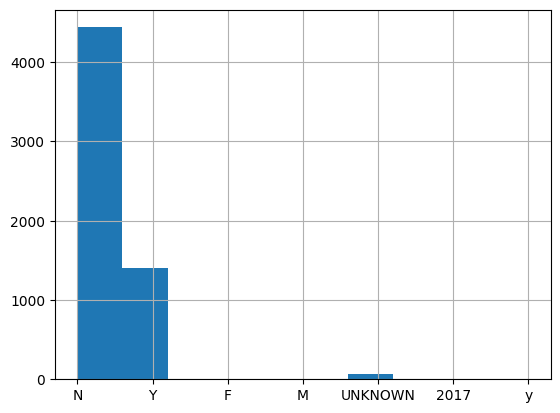

In [ ]:
sdf['Fatal (Y/N)'].unique().tolist()

print(sdf['Fatal (Y/N)'].value_counts())
sdf['Fatal (Y/N)'].hist()

## Missing Data
- Data are *missing* if their values are not recorded in the dataset
- Data are typically missing in different ways: There might simply be no recorded value at all -- `... , , ...` -- in the data or it might be recorded but as a specific missing value value code like `"NA"` or `-999` or `Don't Know` or `Refusal` --- **check the codebook**
- We can't really get started on doing interesting things if the data are full of missings: Pandas will just treat the variable as an object
- Handling missing data is the most important issue when you clean a data set

## Why do we care about missing data?
- Abraham Wald was a statistician during WWII, working for the United States. They asked him to solve a problem. Planes would come in after a battle, hit from enemy fire:

<img src="https://github.com/DS3001/wrangling/blob/main/plane.png?raw=1" width='400' height='400' />

- Where does additional armor go to improve odds of survival?

## Other Missing Data Examples
- Other examples:
    - People who get married have higher salaries, on average
    - People who drink wine have longer lifespans, on average
    - Use of cannabis and psychedelic drugs has been linked to mental illness
    - Many places that imposed stricter pandemic protocols had worse outcomes than places that didn't (e.g. NYC vs CVille)
- In social science, every interesting problem is fundamentally a missing data issue
- "Correlation does not imply causation" isn't a vibe or slogan, it's a mathematical reality with quantitative models and tools for measuring and correcting for the bias

## `nan`'s and Pandas
- In Pandas, there are two options for representing missing values
    - The default is to treat it as an `np.nan` from the NumPy package: "Not-a-number", and its type is `float`
    - Pandas can also treat a missing value as a `None`: An empty/null object without a type or value
- We want to responsibly deal with the presence of the missing values without making bad choices that interfere with subsequent analysis
- You will often have to add the `.nan`s yourself; Pandas brings a lot of empty variable entries in as an empty string

## Exercise (Detecting Missing Data)
- What is the missing data situation in the shark data? Are some variables particularly good or bad? Are the variables reasonably clean?
- Look, in particular, at `Year`, `Age`, `Type`, `Activity`, and `Species`
- How did Pandas import the variables? How did it handle the missing values?

## Cleaning Numeric Variables [Detailed]
- Often, numeric variables include units like dollar signs or separators like commas in their values that need to be cleaned in addition to values that simply aren't recorded: Otherwise, Pandas will drop those values, which can be a big mistake
- To clean a numeric variable:
    1. Cleaning: Remove symbols like units (e.g. `$`) or separators (e.g. `1,000`) to preserve as much data as possible using `df[var].str.replace(pattern, replacement)`
    2. Coercion: Coerce the values to numeric using the Pandas method `pd.to_numeric(var)`
    3. Imputation: Often, you'll also want to create a missing value dummy variable using `df[var].isnull()` and **impute** a `value` using `df[var].fillNA(value)` or `df[var].replace(np.nan,value)` to the missing values

In [ ]:
var = 'age'
print('Before coercion: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number
df[var].hist(bins=50) # Initial histogram; check out the x axis

NameError: ignored

In [ ]:
# How to coerce a variable to numeric:
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric

# How to create a missing value dummy:
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?


NameError: ignored

## Exercise (Numeric Handling)
- Clean the `Age` variable for the shark data

## Cleaning Categorical Variables [Detailed]
- To clean a categorical variable,
    - Option 1: Replace each type of missing value with a new category that indicates the information abotu why the variable is missing, as appropriate
    - Option 2: Replace missings with `.nan`, and create a dummy for each qualitative type of missing value
- With the pretrial data, good examples of this are `case_type` and `is_poor`

## Multiple Missing Types
- Sometimes, data have more than one flavor of missing:

<img src="https://github.com/DS3001/wrangling/blob/main/NA_codes.jpg?raw=1" width='400' height='400' />

- In a case like this, you make sure there's a unique category for each kind of missing that might occur
- Why might this matter? Imagine a household survey question about drug use or multiple numerals for a dummy
- An example of this is (unintentionally) the `is_poor` variable


In [ ]:
var = 'case_type'
print(df[var].unique(), '\n') # A Categorical Example
df[var] = df[var].replace(' ',np.nan) # Notice the column replacement
print(df[var].value_counts(), '\n')
#
var = 'is_poor' # A Dummy Example
print(df[var].unique(), '\n')
df[var] = df[var].replace( [9,99], np.nan) # Notice the list
print(df[var].value_counts()) # A Dummy Example

['F' 'M' 'S' ' ' 'I'] 

case_type
M    13616
F     7029
S     2309
I        6
Name: count, dtype: int64 

[99  9  0  1] 

is_poor
0.0    11500
1.0    10465
Name: count, dtype: int64


## Exercise (Categorical Handling)
- Clean the `Type` variable as much as possible
- Create a dummy variable (0/1 valued) that indicates the shark attack was fatal, with `np.nan` for values that are missing
- Which attacks were provoked? Is "not provoked" the same thing as `Unprovoked`?

## When are the data "clean"?
- OK, the data are loaded: Now we want to clean them for analysis
- For the kinds of analysis we do, the data are *clean* when:
  - The data are in a single $N \times K$ matrix $X$
  - Each row $i=1,...,N$ represents a single observation
  - The observations are all of the same kind (e.g. entrepreneurs versus companies)
  - Each column $k=1,...,K$ represents a variable
  - Missing values are appropriately "handled" (converted to `.nan` where appropriate or imputed/missing-dummied when appropriate)
- We might also want some other things (this updgrades "clean" to "tidy"):
  - The variable names make sense (not "NewVaCode297ViolentOff_VCCPrefix")
  - "Unnecessary" variables are removed
  - Dates are converted into numerical values, like decimal date (e.g. 2018.125) or numeric dummies
  - If the data are contained in multiple files, you end up with a single file combining all the relevant data

## Investigating Missing Data: A Case Study
- Handling the `.nan`'s is really just the first step with missing data
- For key variables, you want to eliminate as many `.nan`'s as possible through detective work
- Let's take a look at the `bond` variable: This is a crucial variable in the justice system, and most of the values are missing
- This is an example of a variable with a **long tail** of values

In [6]:
df['bond'].unique()
df['bond'].value_counts()

KeyError: ignored

In [7]:
var = 'bond'
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['bond_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['bond_NA']),'\n') # How many missing values are there?


KeyError: ignored

## Investigating Missing Data: Cross tabulation
- The relationships between variables are important, and we want a quick way of seeing how they relate
- *Cross tabulation* is when you break two variables into categories, and enumerate the number in each of the bins
- The call in Pandas is `pd.crosstab( df[var1], df[var2] )`
- Notice this is a Pandas method (`pd.`) and not a dataframe object method (`df.`)
- This is often the first step in determining how variables co-vary with one another, before computing a statistic or using a model

In [8]:
pd.crosstab(df['is_poor'], df['case_type']) # Notice the use of pd. and not df.

KeyError: ignored

## Investigating Missing Data: A Case Study
- Let's see if we can explain *why* bond is missing so much using other variables, like whether the person was released pre-trial or the type of bond imposed.
- In the codebook, we have (notice, no category 8...):
  
![Bond Types](https://github.com/DS3001/wrangling/blob/main/bondType.png?raw=1)



In [ ]:
df['bond_NA'] = df['bond'].isnull()
print(pd.crosstab(df['bond_NA'],df['PretrialReleaseType1']),'\n') # Not very illuminating

PretrialReleaseType1     0     1     2     3     4    5   6    7    8    9
bond_NA                                                                   
False                  367    39     0  5333  3015   35   0  306  388   85
True                  3434  1855  5273   447  1009  140  12  270  737  241 



In [ ]:
print(pd.crosstab(df['bond_NA'],df['BondTypeAtInitialContact']),'\n') # Aha

BondTypeAtInitialContact     1     2     3     4    5     6    7  9
bond_NA                                                            
False                        0  4149  5419     0    0     0    0  0
True                      5953     0     0  1805  254  5285  117  4 



## Replacing Values
- So we want to replace certain values of the **bond** depending on values of the **bond type**
- There are (at least) two ways to do this:
    - Use `df.loc[ condition, var] = value` to replace the value of variable `var` with `value` depending on whether `condition` is true
    - Use `df[var].mask(condition,value)` to replace the value of variable `var` with `value` depending on whether `condition` is true
- We have a serious dilemma with bond category 1

## Logical Operators
- Often, we want R to check a complex logical condition for every observation
- These are some of the most commonly used operators:
| Operator | Meaning |
| :---: | :---:|
| `and` | and |
|`or` | or |
|$==$, $!=$ | equivalence, inequivalence |
|`<=`,`<` | less-than-equal-to, less-than |
| `in`, `not in`| set membership, set non-membership |
- For example, we'll want to determine the observations for which `df['is_poor'] == (9 or 99)`

Axes(0.125,0.11;0.775x0.77) 

count     16912.000000
mean       1464.159413
std        2923.362046
min           0.000000
25%           0.000000
50%        1000.000000
75%        2500.000000
max      160000.000000
Name: bond, dtype: float64 

BondTypeAtInitialContact     1     2     3     4    5     6    7  9
bond_NA                                                            
False                        0  4149  5419  1805  254  5285    0  0
True                      5953     0     0     0    0     0  117  4 



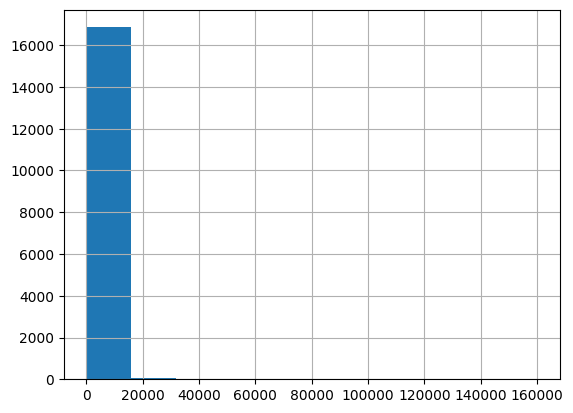

In [ ]:
## For each bond type, replace the missings

# df.loc[ df['BondTypeAtInitialContact'] == 9, 'bond'] = np.nan # Missing
# df.loc[ df['BondTypeAtInitialContact'] == 7, 'bond'] = np.nan # Unknown

df.loc[ df['BondTypeAtInitialContact'] == 6, 'bond'] = 0 # No bond posted
df.loc[ df['BondTypeAtInitialContact'] == 5, 'bond'] = 0 # No bond posted
df.loc[ df['BondTypeAtInitialContact'] == 4, 'bond'] = 0 # No bond posted

df['held_wo_bail'] = (df['BondTypeAtInitialContact'] == 1) # Create a held-without-bail dummy
df['bond'].mask(df['BondTypeAtInitialContact'] ==1 , np.nan ) # Held without bail. Nan or Inf?

print(df['bond'].hist(), '\n')
print(df['bond'].describe(), '\n')
df['bond_NA'] = df['bond'].isnull() # Update the missing dummy
print(pd.crosstab(df['bond_NA'],df['BondTypeAtInitialContact']),'\n')


## Investigating Missing Data: A Case Study
- Notice how we handled the "held without bail issue": There is a lot of nuance here
- At this point, I'd drop categories 7 and 9, and leave the missing bond values as "held without bail"
- You might be thinking, "He is really into analyzing bonds!"
- Not exactly: Cleaning data sets requires some detective work, that's what we're illustrating
- The cleaner your data are, the stronger the *signal* becomes relative to the *noise*, reducing *attenuation* of your findings
- It requires your full cognitive attention, or your results will be garbage that makes everyone less informed, knowledgeable, and productive ("GIGO")
- What are the consequences for society if you do a garbage analysis of bonds and sentencing?
- We can't get this deeply into every variable in the data, but we must do it for the key ones for our analysis
- So how do we continue cleaning up the `bond` variable?

## Exercises
- Cross tabulate the cleaned `Type` and `fatal` variables
- Clean the `Type` variable up a bit by creating a new variable and consolidating the values into a smaller number of categories by replacing values
- Cross tab your new variable and `fatal`
- Are provoked attacks typically fatal? Which types of attack are most likely to be fatal?
- What does this mean?
- How does this exercise make you feel about sharks?

## Selecting Subsets of the Observations (Row Filtering)
- We often want to focus only on a subset of the observations, like defendants accused of a felony
- We can **filter** on a conditional/Boolean statement, selecting the rows that get a 1 and discarding those that get a zero
- This creates a new dataframe, focused just on what we're interested in: `df['case_type']=='F'`
- For example, in the case of felonies, we can create a new dataframe: `df_felony = df[ df['case_type']=='F' ]`In general, the synattax is
 `new_df = df[ conditional ]`

In [ ]:
print(df['case_type'].value_counts(), '\n') # How many charges of each type?
conditional =  (df['case_type']=='F') # Conditional: The charge is a felony
print(conditional.value_counts(), '\n') # Counts for the conditional variable
df_felony = df[ conditional ] # Create new dataset
print('Old dataframe: ', df.shape, '\n', 'New dataframe: ', df_felony.shape) # Dimensions of original and new dataframes

case_type
M    13616
F     7029
S     2309
I        6
Name: count, dtype: int64 

case_type
False    15957
True      7029
Name: count, dtype: int64 

Old dataframe:  (22986, 714) 
 New dataframe:  (7029, 714)


## Selecting Subsets of the Variables (Column Filtering)
- Suppose you only have a few variables you're actually interested in, or you might not want to release some sensitive data like names or phone numbers
- You can use `new_df = df.filter( list )` to keep a specific set of variables in the list `list = [var1, var2, ..., varN]`
- You can use `new_df = df.drop( list, axis=1 )` to drop a specific set of variables in the list `list = [var1, var2, ..., varN]`
- For example, we might want only the demographic data, `list = ['Defendant_Age', 'Defendant_Sex', 'Defendant_Race']`... or we might want to hide those variables for privacy reasons

In [ ]:
list = ['Defendant_Age', 'Defendant_Sex', 'Defendant_Race']
new_df = df.filter(list) # Keep only the variables on the list
print( new_df.columns, '\n', new_df.shape, '\n')
new_df = df.drop(list,axis=1) # Drop only the variables on the list
print( new_df.columns, '\n', new_df.shape)

Index(['Defendant_Age', 'Defendant_Sex', 'Defendant_Race'], dtype='object') 
 (22986, 3) 

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_BirthYear',
       'Defendant_AgeGroup', 'Defendant_AgeatCurrentArrest',
       'Defendant_AttorneyTypeAtCaseClosure', 'is_poor',
       'Defendant_RecordedZipCode_eMag', 'Defendant_VirginiaResidencyStatus',
       'released',
       ...
       'NewFelonySexualAssaultArrest_Disposition',
       'Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis',
       'CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual',
       'DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound',
       'CrimeCommission2021ReportClassificationofDefendants', 'age', 'sex',
       'age_nan', 'bond_NA', 'held_wo_bail'],
      dtype='object', length=711) 
 (22986, 711)


## Saving Your Cleaned Data
- Do not ever overwrite the original data file: Put it aside and save it for reproducibility purposes
- The most common format to save data in is `.csv`, and the command is almost the same as the one to read the data in: `df.to_csv('')`

## Exercises (Finishing Up)
- The next code chunk cleans a bunch of variables I am interested in from the pretrial data and drops the ones I am not interested in
- For the shark data, drop all the columns that are "Unnamed"
- Save your data as a `.csv` with a new name (not `sharks.csv`, which is the original data file; maybe `sharks_clean.csv`)

In [ ]:
df.to_csv('pretrial_data.csv')